# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [5]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../train.p'
testing_file = '../test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train_raw, y_train_raw = train['features'], train['labels']
X_test_raw, y_test = test['features'], test['labels']

print("Training size x {}".format(len(X_train_raw)))
print("Training size y {}".format(len(y_train_raw)))
print("Test size x {}".format(len(X_test_raw)))
print("Test size y {}".format(len(y_test)))

print("Image shape {}".format(X_train_raw[0].shape))

print("Classes {}".format(len(set(y_train_raw))))


Training size x 39209
Training size y 39209
Test size x 12630
Test size y 12630
Image shape (32, 32, 3)
Classes 43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [6]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train_raw.shape[0]

# TODO: Number of testing examples.
n_test = X_test_raw.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_raw[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

2


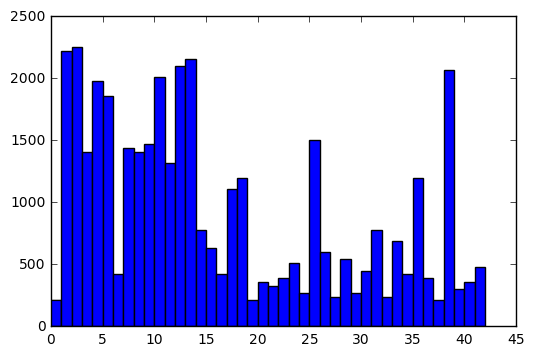

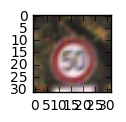

In [7]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train_raw))
image = X_train_raw[index]
plt.hist(y_train_raw, bins=range(43))

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train_raw[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

/home/sean/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


10


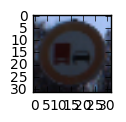

In [8]:
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
%matplotlib inline
### Preprocess the data here.

X_train_tmp = X_train_raw.reshape(X_train_raw.shape[0],-1)
X_test_tmp = X_test_raw.reshape(X_test_raw.shape[0],-1)

minmax_scale = preprocessing.MinMaxScaler().fit(X_train_tmp)
X_train_norm = minmax_scale.transform(X_train_tmp).reshape(X_train_raw.shape)
X_test = minmax_scale.transform(X_test_tmp).reshape(X_test_raw.shape)

index = random.randint(0, len(X_train_norm))
image = X_train_norm[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train_raw[index])

#X_train, y_train = shuffle(X_train_norm, y_train_raw)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

In [ ]:
"""
I used scikit-learn's MinMax normalization, this reduces the input to within [0,1] and gives the data equal variance.
This standardization helps prevent the optimizer from getting stuck in local minima while training, as all the 
features are normalized to similar range so all the weights should train at same speed.
"""

**Answer:**



In [74]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

X_train, X_validation, y_train, y_validation= train_test_split(X_train_norm, y_train_raw,test_size=0.2,random_state=15)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

In [ ]:
"""
I created a validation set using the train_test_split function from scikit-learn. I use 20% of the training set
as the validation set. I experimented with generating data using random rotations and scales, but ended up having
issues with image format so did not include it in my submission.
"""

**Answer:**

In [75]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

mu = 0
sigma = 0.1

weights= [tf.Variable(tf.truncated_normal([3, 3, 3, 32],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([3, 3, 32, 32],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([3, 3, 32, 96],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([3, 3, 96, 96],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([2400, 400],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([400, 84],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([84, 43],mean = mu, stddev = sigma))]

bias =[tf.Variable(tf.zeros(32)),
tf.Variable(tf.zeros(32)),
tf.Variable(tf.zeros(96)),
tf.Variable(tf.zeros(96)),
tf.Variable(tf.zeros(400)),
tf.Variable(tf.zeros(84)),
tf.Variable(tf.zeros(43))]

def conv2d(x, W, b, strides=1): 
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID') 
    x = tf.nn.bias_add(x, b) 
    return tf.nn.relu(x)

def LeNet(x, weights, bias):    
    x = tf.nn.dropout(x, keep_prob2)
    
    conv_net = conv2d(x,weights[0],bias[0],1)
    
    #downsample
    conv_net = conv2d(conv_net,weights[1],bias[1],2)    
    conv_net = tf.nn.dropout(conv_net, keep_prob)
    
    conv_net = conv2d(conv_net,weights[2],bias[2],1)
    
    #downsample
    conv_net = conv2d(conv_net,weights[3],bias[3],2)
    conv_net = tf.nn.dropout(conv_net, keep_prob)
    
    #fully connected layer
    fc1 = tf.reshape( conv_net,[-1, 2400]) 
    fc1 = tf.add(tf.matmul(fc1, weights[4]), bias[4]) 
    fc1 = tf.nn.relu(fc1) 
    fc1 = tf.nn.dropout(fc1, keep_prob)

    #fully connected layer
    fc2 = tf.add(tf.matmul(fc1, weights[5]), bias[5]) 
    fc2 = tf.nn.relu(fc2) 
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    logits = tf.add(tf.matmul(fc2, weights[6]), bias[6])
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
"""
My architecture is based off the LeNet lab, but I used convolutions for downsampling instead of max pooling
layers. In addtion I used all 3X3 convolutions. These changes were inspired by [1] as I discuss in question 5. For
regularization I used dropout and L2. For the depth of the convolutions I start out with 32 and increased it to 96
in the next layer, I found these changes greatly improved the networks accuracy on the validation set. 

INPUT -> [CONV -> RELU -> POOL(Conv with stride of 2) -> Dropout]*2 -> FC -> RELU -> Dropout -> FC -> Dropout

[1] Jost Tobias Springenberg, Alexey Dosovitskiy, Thomas Brox, Martin A. Riedmiller:
Striving for Simplicity: The All Convolutional Net. CoRR abs/1412.6806 (2014)
"""

In [76]:
EPOCHS = 30
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
rate = tf.placeholder(tf.float32)

keep_prob = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [77]:
logits = LeNet(x, weights, bias)
beta = 0.0005

#cross entropy with L2 regularization
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y) + \
                    beta*tf.nn.l2_loss(weights[0]) + \
                    beta*tf.nn.l2_loss(weights[1]) + \
                    beta*tf.nn.l2_loss(weights[2]) + \
                    beta*tf.nn.l2_loss(weights[3]) + \
                    beta*tf.nn.l2_loss(weights[4]) + \
                    beta*tf.nn.l2_loss(weights[5]) + \
                    beta*tf.nn.l2_loss(weights[6])


loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob2: 1.0, rate: 0.001})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [78]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
     
    #{x: batch_x, y: batch_y,keep_prob: 0.5}
    print("Training...")
    print()
    for i in range(EPOCHS):
        l_rate = 0.001
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5, keep_prob2: 1.0, rate: l_rate})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic-signs')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.449

EPOCH 2 ...
Validation Accuracy = 0.710

EPOCH 3 ...
Validation Accuracy = 0.891

EPOCH 4 ...
Validation Accuracy = 0.933

EPOCH 5 ...
Validation Accuracy = 0.959

EPOCH 6 ...
Validation Accuracy = 0.973

EPOCH 7 ...
Validation Accuracy = 0.978

EPOCH 8 ...
Validation Accuracy = 0.981

EPOCH 9 ...
Validation Accuracy = 0.983

EPOCH 10 ...
Validation Accuracy = 0.987

EPOCH 11 ...
Validation Accuracy = 0.988

EPOCH 12 ...
Validation Accuracy = 0.986

EPOCH 13 ...
Validation Accuracy = 0.989

EPOCH 14 ...
Validation Accuracy = 0.987

EPOCH 15 ...
Validation Accuracy = 0.991

EPOCH 16 ...
Validation Accuracy = 0.991

EPOCH 17 ...
Validation Accuracy = 0.991

EPOCH 18 ...
Validation Accuracy = 0.991

EPOCH 19 ...
Validation Accuracy = 0.992

EPOCH 20 ...
Validation Accuracy = 0.990

EPOCH 21 ...
Validation Accuracy = 0.994

EPOCH 22 ...
Validation Accuracy = 0.993

EPOCH 23 ...
Validation Accuracy = 0.994

EPOCH 24 ...
Validation Accura

In [79]:
#Evaluate Model on test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.976


             precision    recall  f1-score   support

          0       0.97      1.00      0.98        60
          1       0.94      0.99      0.96       720
          2       0.98      0.99      0.98       750
          3       0.99      0.96      0.98       450
          4       0.99      0.98      0.99       660
          5       0.96      0.99      0.97       630
          6       1.00      0.97      0.99       150
          7       0.99      0.98      0.99       450
          8       0.99      0.99      0.99       450
          9       0.98      1.00      0.99       480
         10       0.99      0.99      0.99       660
         11       0.98      0.96      0.97       420
         12       1.00      0.97      0.98       690
         13       0.99      1.00      1.00       720
         14       1.00      1.00      1.00       270
         15       0.94      1.00      0.97       210
         16       1.00      0.98      0.99       150
         17       1.00      0.99      1.00   

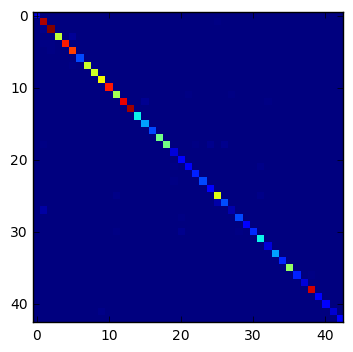

In [110]:
#look at confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    total_predictions = None
    num_examples = len(X_test)
    sess = tf.get_default_session()
    #do it in batches so we don't run out of memory 
    for offset in range(0, num_examples, 6000):
        batch_x, batch_y = X_test[offset:offset+6000], y_test[offset:offset+6000]
        predictions = sess.run(tf.argmax(logits, 1),feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob2: 1.0, rate: 0.001})
        #print(predictions.shape)
        if(total_predictions is None):
            total_predictions = predictions
        else:
            total_predictions = np.hstack([total_predictions,predictions])
            
    mat = confusion_matrix(y_test,total_predictions)
    plt.imshow(mat, interpolation='nearest')
    report = classification_report(y_test,total_predictions)
    print(report)

In [ ]:
"""
I had really bad precision and recall for the pedestrians class. Also from the confusion matrix you can see most 
of the misclassifications came from the classes with fewer examples. This shows that data augmentation and a larger
dataset would have been beneficial. 
"""

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

In [ ]:
"""
I used the Adam Optimizer that was used in the LeNet lab as well as the batch size of 128. For learning rate I 
used 0.001 and ran 30 epochs. I attemped decreasing my learning rate over time but after reading about the Adam
optimizer I found that it was not necessary in this case as the optimizer computes a adaptive learning rate.
"""

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

In [ ]:
"""
My process was mostly trial and error, I used the LeNet Lab as a starting point for this project which had about
~95% accuracy on the validation set to start. Initally I tried adding regularization to LeNet architecture 
using dropout and L2 regularization, but did not get noticeable improvements. At this point I decided to try 
some different architectures, and looked into how to replace max pooling layers, and found [1], and decided to 
adjust my model based on some its findings: I replaced the 5X5 convolutions with 3x3 and replaced the maxpooling
layers with 3X3 convolutions with a stride of 2. Also following [1] dropout was used after downsampling layers 
to prevent overfitting. I also increased the depth of the convolutional layers. Springenberg et al. also discuss 
adding dropout of 0.2 to the input layer, I experimented with this and did not have good results, so did not use it. 
Because I increased the depth of the convolutional layers and as a result the fully connected layers I also added 
L2 regulartization to prevent overfitting.

[1] Jost Tobias Springenberg, Alexey Dosovitskiy, Thomas Brox, Martin A. Riedmiller:
Striving for Simplicity: The All Convolutional Net. CoRR abs/1412.6806 (2014)
"""

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

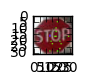

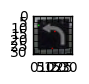

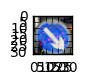

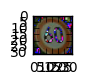

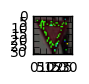

In [101]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob, os
from matplotlib.image import imread
from skimage import transform
imgs = []
for file in os.listdir("test_signs"):
    if file.endswith(".jpg"):
        img = imread("test_signs/" + file)
        img = minmax_scale.transform(img.reshape(1,-1)).reshape(32,32,3)
        imgs.append(img)
        plt.figure(figsize=(0.5,0.5))
        plt.imshow(img)

images = np.array(imgs)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
"""
The stop sign, yield sign and left turn sign I took with my cellphone. The stay right and 60 sign I found
on the internet. Some of the images above are quite dark, especially the yield sign. The version of turn left sign 
is not in the dataset provided, but I was interested to see if it could be classified even though the turn left sign
from the dataset has a different shaped arrow and has a different color for its background. The stay right sign 
was a little beat up in this picture and so I was wondering if that would affect the classification.
"""

In [98]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    classification = sess.run(tf.nn.softmax(logits), feed_dict={x: images, y: 0, keep_prob: 1.0, keep_prob2: 1.0, rate: 0.001})
    print("Predicted Classes:")
    print(np.argmax(classification,axis=1))


Predicted Classes:
[14 12 38  3 14]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
"""
The model classified 3/5 of the images correctly. It classified the turn left sign as a priority road, given that
this version of the sign was not in the dataset, I am not suprised at the misclassification; however, it would be 
nice if the model was able to generalize the turn left image better. The yield sign was classified as a stop sign. 
"""

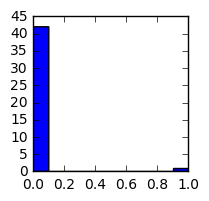

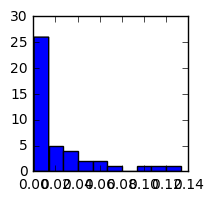

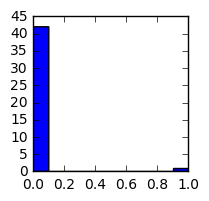

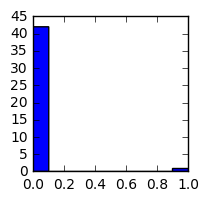

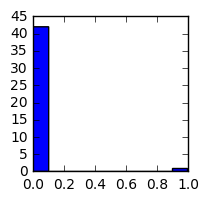

In [99]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
%matplotlib inline
for i in classification:
    plt.figure(figsize=(2,2))
    plt.hist(i)


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

[[  9.99998689e-01   7.64182801e-07   5.10451684e-07   5.21908028e-08
    3.57916541e-08]
 [  1.33082449e-01   1.06724769e-01   9.87539440e-02   7.48889521e-02
    5.70046455e-02]
 [  1.00000000e+00   1.61238752e-12   2.00612622e-14   3.54622572e-16
    1.84649331e-16]
 [  9.96577799e-01   3.40619963e-03   1.35792206e-05   6.24912843e-07
    5.58736701e-07]
 [  9.91823137e-01   5.90558257e-03   1.75852957e-03   2.17427398e-04
    1.76239177e-04]]
[[14 15  1 25 17]
 [12 13 35  7 36]
 [38 34 36 39 40]
 [ 3  2  5  9 13]
 [14 13 17  1 15]]


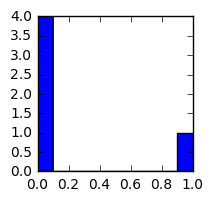

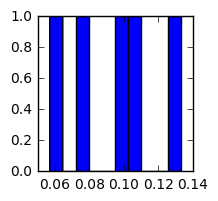

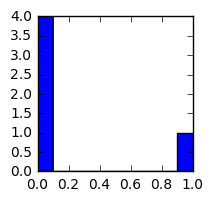

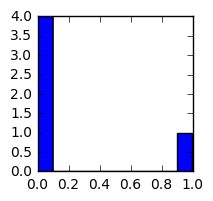

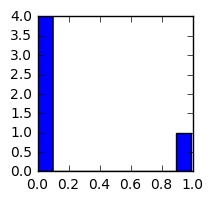

In [100]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    top_k = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: images, y: 0, keep_prob: 1.0, keep_prob2: 1.0, rate: 0.001})
    print(top_k.values)
    print(top_k.indices)
    for j,i in enumerate(top_k.values):
        plt.figure(figsize=(2,2))
        plt.hist(i)

**Answer:**

In [ ]:
"""
Both the yield sign and the turn left sign that were misclassified, had lower certainty for their predictions.
For the turn left sign the model had no where near the correct label in its top five and its largest softmax value
was ~0.14, so there was very little confidence. Whereas for the yield sign the model had the correct label for its
second highest softmax value, although it was very certain that the image was a stop sign.
"""

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.